In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.linalg import lstsq
from sklearn.linear_model import LinearRegression

In [90]:
df_netflix_short_titles = pd.read_csv("netflix_genres_main.csv")
df_netflix_genres = pd.read_csv("netflix_genres.csv")

In [91]:
df_netflix_short_titles.head()

,type,title,listed_in
0,TV Show,3%,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,7:19,"Dramas, International Movies"
2,Movie,23:59,"Horror Movies, International Movies"
3,Movie,9,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,21,Dramas


In [92]:
df_netflix_genres['title'] = df_netflix_genres['short_title']
df_netflix_genres = df_netflix_genres.drop(['Title', 'short_title'], axis=1)
df_netflix_genres.head()

,Start Time,Duration,title
0,12/31/16 0:30,0:01:19,7:19
1,3/5/18 4:35,0:05:18,300
2,4/7/19 5:29,0:18:56,706
3,4/6/19 5:20,1:31:56,706
4,4/6/19 3:07,1:06:03,706


In [93]:
df_netflix_activity=pd.merge(df_netflix_genres, df_netflix_short_titles, on='title', how='inner')

In [94]:
df_netflix_activity.dtypes

Start Time    object
Duration      object
title         object
type          object
listed_in     object
dtype: object

In [95]:
df_netflix_activity['Start Time'] = pd.to_datetime(df_netflix_activity['Start Time'], utc = True)
df_netflix_activity['Duration']= pd.to_timedelta(df_netflix_activity['Duration'])
# change the Start Time column into the dataframe's index
df_netflix_activity = df_netflix_activity.set_index('Start Time')
# convert from UTC timezone to eastern time
df_netflix_activity.index = df_netflix_activity.index.tz_convert('US/Eastern')
# reset the index so that Start Time becomes a column again
df_netflix_activity = df_netflix_activity.reset_index()
#double-check that it worked
df_netflix_activity.head(1)
df_netflix_activity.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
title                             object
type                              object
listed_in                         object
dtype: object

In [96]:
df_netflix_activity.head(2)

,Start Time,Duration,title,type,listed_in
0,2016-12-30 19:30:00-05:00,00:01:19,7:19,Movie,"Dramas, International Movies"
1,2019-04-07 01:29:00-04:00,00:18:56,706,Movie,"Horror Movies, International Movies"


In [97]:
df_netflix_activity['weekday'] = df_netflix_activity['Start Time'].dt.weekday
df_netflix_activity['hour'] = df_netflix_activity['Start Time'].dt.hour
df_netflix_activity.head(2)

,Start Time,Duration,title,type,listed_in,weekday,hour
0,2016-12-30 19:30:00-05:00,00:01:19,7:19,Movie,"Dramas, International Movies",4,19
1,2019-04-07 01:29:00-04:00,00:18:56,706,Movie,"Horror Movies, International Movies",6,1


In [98]:
genres_split_df=df_netflix_activity["listed_in"].str.split(",", n = 5, expand = True)
df_netflix_activity['genre1'] = genres_split_df[0]
df_netflix_activity['genre2'] = genres_split_df[1]
df_netflix_activity['genre3'] = genres_split_df[2]

In [141]:
df_netflix_activity.head(20)

,Start Time,Duration,title,type,listed_in,weekday,hour,genre1,genre2,genre3
0,2016-12-30 19:30:00-05:00,00:01:19,7:19,Movie,"Dramas, International Movies",4,19,Dramas,International Movies,None
1,2019-04-07 01:29:00-04:00,00:18:56,706,Movie,"Horror Movies, International Movies",6,1,Horror Movies,International Movies,None
2,2019-04-06 01:20:00-04:00,01:31:56,706,Movie,"Horror Movies, International Movies",5,1,Horror Movies,International Movies,None
3,2019-04-05 23:07:00-04:00,01:06:03,706,Movie,"Horror Movies, International Movies",4,23,Horror Movies,International Movies,None
4,2019-04-05 01:52:00-04:00,00:25:32,706,Movie,"Horror Movies, International Movies",4,1,Horror Movies,International Movies,None
5,2019-04-05 00:52:00-04:00,00:00:19,706,Movie,"Horror Movies, International Movies",4,0,Horror Movies,International Movies,None
6,2020-11-03 23:23:00-05:00,00:01:47,1922,Movie,"Dramas, Thrillers",1,23,Dramas,Thrillers,None
7,2020-03-21 16:58:00-04:00,00:06:19,3022,Movie,"Independent Movies, Sci-Fi & Fantasy, Thrillers",5,16,Independent Movies,Sci-Fi & Fantasy,Thrillers
8,2020-03-21 01:03:00-04:00,00:00:39,3022,Movie,"Independent Movies, Sci-Fi & Fantasy, Thrillers",5,1,Independent Movies,Sci-Fi & Fantasy,Thrillers
9,2020-08-30 01:23:00-04:00,00:35:10,22-Jul,Movie,"Dramas, Thrillers",6,1,Dramas,Thrillers,None


In [100]:
df_netflix_activity.shape

(13937, 10)

In [101]:
df_netflix_activity['type'].value_counts()

TV Show    12203
Movie       1734
Name: type, dtype: int64

In [106]:
df_netflix_activity['genre1'].value_counts()

Kids' TV                        5869
Crime TV Shows                  1946
British TV Shows                1422
Classic & Cult TV               1046
International TV Shows           566
Dramas                           502
Action & Adventure               480
TV Comedies                      406
Comedies                         341
Romantic TV Shows                226
TV Dramas                        210
Children & Family Movies         193
TV Action & Adventure            145
Docuseries                       131
Reality TV                       110
Stand-Up Comedy & Talk Shows      64
Horror Movies                     63
TV Horror                         57
Documentaries                     55
International Movies              43
Classic Movies                    28
Thrillers                         17
Sci-Fi & Fantasy                   4
Cult Movies                        3
TV Shows                           3
Independent Movies                 2
Anime Series                       2
S

In [103]:
def make_X(df, var_names):
    """Given a DataFrame and a list of explanatory variables, one-hot encodes
    variables if they are categorical and returns a dataframe with 
    all the given explanatory variables."""
    categorical = ["genre1", "genre2", "genre3", "weekday", "hour"]
    boolean = ["is holiday", "is work day"]
    X = pd.DataFrame({"intercept":np.ones(df.shape[0], dtype='int')}, index = df.index)
    for var in var_names:
        if var in categorical:
            dummies = pd.get_dummies(df[var])
            formatted = dummies.drop(dummies.columns[-1], axis=1)
        elif var in boolean:
            formatted = (df[var] == "yes") * 1
        else:
            formatted = df.loc[:, var]
        X = X.join(formatted)
      
    return X

In [136]:
# set the random seed
np.random.seed(28)

netflix_train, netflix_test = train_test_split(df_netflix_activity, train_size=0.8, test_size=0.2)


In [137]:
y_train = netflix_train['weekday']
y_train.head()

1773     6
9330     5
10626    3
2461     3
9253     0
Name: weekday, dtype: int64

In [138]:
expl_vars = ["genre1"]

# convert the explanatory table to the correct format
X_train = make_X(netflix_train, expl_vars)

# show the first five rows of the model inputs
X_train.head()

,intercept,Action & Adventure,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,Reality TV,Romantic TV Shows,Sci-Fi & Fantasy,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Shows
1773,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9330,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10626,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2461,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9253,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
# calculate the least squares solution
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
netflix_train['predicted'] = model.predict(X_train)

/Users/sjoshi2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


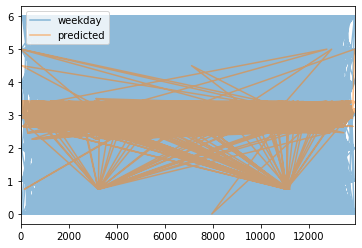

In [140]:
netflix_train[['weekday','predicted']].plot(alpha=0.5);

In [130]:
netflix_train.head(20)

,Start Time,Duration,title,type,listed_in,weekday,hour,genre1,genre2,genre3,predicted
1773,2020-10-11 22:32:00-04:00,00:21:44,Fast & Furious Spy Racers,TV Show,Kids' TV,6,22,Kids' TV,None,None,16.997657
9330,2018-02-17 21:15:00-05:00,00:12:17,PJ Masks,TV Show,Kids' TV,5,21,Kids' TV,None,None,16.997657
10626,2020-01-23 19:50:00-05:00,00:04:13,Robot Trains,TV Show,"Kids' TV, Korean TV Shows",3,19,Kids' TV,Korean TV Shows,None,16.997657
2461,2017-05-18 21:43:00-04:00,00:22:44,Friends,TV Show,"Classic & Cult TV, TV Comedies",3,21,Classic & Cult TV,TV Comedies,None,10.942308
9253,2018-03-05 21:58:00-05:00,00:19:35,PJ Masks,TV Show,Kids' TV,0,21,Kids' TV,None,None,16.997657
10682,2019-07-09 05:30:00-04:00,00:10:37,Royal Pains,TV Show,"TV Comedies, TV Dramas",1,5,TV Comedies,TV Dramas,None,9.731928
965,2016-12-13 18:28:00-05:00,00:38:05,Criminal Minds,TV Show,"Crime TV Shows, TV Dramas, TV Mysteries",1,18,Crime TV Shows,TV Dramas,TV Mysteries,11.637356
1596,2020-09-23 23:45:00-04:00,00:03:14,Dolly Kitty Aur Woh Chamakte Sitare,Movie,"Dramas, Independent Movies, International Movies",2,23,Dramas,Independent Movies,International Movies,11.956853
6588,2018-02-08 00:06:00-05:00,00:01:58,Maroon,Movie,"Dramas, Independent Movies, International Movies",3,0,Dramas,Independent Movies,International Movies,11.956853
10154,2015-04-10 16:26:00-04:00,00:08:38,Queen,Movie,"Comedies, Dramas, International Movies",4,16,Comedies,Dramas,International Movies,11.822464
